In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

# Compressed Sensing Tutorial
###### Written by Miki Lustig, Translated to Python by Frank Ong and Jon Tamir

In this assignment we will explore some of the basic elements of compressed sensing: Sparsity, Incoherent measurements and the Sparsity based reconstruction.

### Sparse Signal denoising

Before we start with compressed sensing, we’ll look at sparse signal de-noising. There’s a strong connection between compressed sensing and denoising. Here we'll attempt to denoise a sparse signal that is corrupted by random noise.

Generate a length-128 vector, x, with 5 non-zero coefficients and permute them randomly using:

    x = np.array(  [0.2, 0.5, 0.6, 0.8, 1] + [0] * (128-5) )
    x = x[ np.random.permutation(128) - 1 ];
    
Plot the resulting signal using `plt.stem(x)`

<StemContainer object of 3 artists>

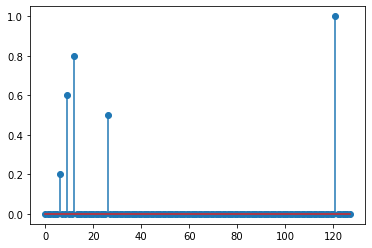

In [2]:
# Your code here:
x = np.array([0.2, 0.5, 0.6, 0.8, 1] + [0]* (128 - 5))
x = x[np.random.permutation(128)-1]

plt.stem(x)

Add random gaussian noise with standard deviation $\sigma = 0.05$ to the signal, $y = x + n$ and plot it

    y = x + 0.05 * np.random.randn( 128 )

<StemContainer object of 3 artists>

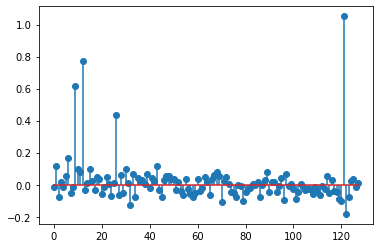

In [3]:
# Your code here:
y = x + 0.05 * np.random.randn(128)

plt.stem(y)


Many approaches for denoising and regularization use the Tychonov penalty to estimate the signal from noisy data. Specifically, they try to solve:

$$\hat x = \arg\min_{x} \frac{1}{2} ||x - y||_2^2 + \frac{\lambda}{2} ||x||_2^2$$

This optimization trades the norm of the solution with data consistency. The nice thing about this approach that it has a closed form solution, and finding the minimum is a linear problem.

__Q)__ Show that the solution for this problem is

$$\hat x = \frac{1}{1+\lambda} y $$





__A):__

Observe what happens when we plot the result for $\lambda = \{0.01, 0.05, 0.1, 0.2\}$. Use plt.stem(xhat) to plot the results.

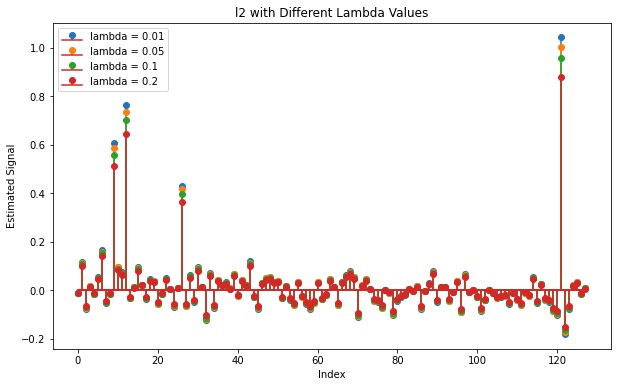

In [4]:
# Plot the resulting signals (xhat) for lambda = [0.01, 0.05, 0.1, 0.2]
# Your code here:
lmbdas = [0.01, 0.05, 0.1, 0.2]

plt.figure(figsize=(10, 6))
for i, lmbda in enumerate(lmbdas):
    xhat = y/(1+lmbda)
    plt.stem(xhat, label=f'lambda = {lmbda}', linefmt='C'+str(i), markerfmt='C'+str(i)+'o')

plt.xlabel('Index')
plt.ylabel('Estimated Signal')
plt.title("l2 with Different Lambda Values")
plt.legend()
plt.show()



__Q)__ Is the solution sparse?

__A)__

___

### Sparse Signals and the $\ell_1$ Norm

Instead of Tychonov regularization, which penalizes
the $\ell_2$ norm ($||x||_2 = 􏰆􏰄\sum_i |x_i|^2)$ ), we will use the an $ \ell_1$ norm ($||x_1|| = 􏰄\sum_i |xi|$) penalized solution. Specifically we will solve:

$$  \hat x = \arg\min_{x} \frac{1}{2} ||x - y||_2^2 + \lambda ||x||_1 $$

It turns out that this is very easy to solve. Because the variables $\hat x$'s are independent we can
minimize each of them separately by solving  

$$\arg\min_{x_i} \frac{1}{2}(x_i - y_i)^2 + \lambda ~|x_i|$$

The solution to each $x_i$ has a closed form. 

__Q)__ Show that when $ y > \lambda$, the solution is

$$ \hat x = y - \lambda $$

when $ y < -\lambda$,

$$ \hat x = y + \lambda $$

and when $ -\lambda <= y <= \lambda$

$$ \hat x = 0 $$


__A) Derivation of soft-thresholding:__



___

Write a function `SoftThresh` that accepts $y$ and $\lambda$ and returns $\hat x$. Plot the output for $t \in [-10, 10]$ and $\lambda = 2$. 


In [5]:
def SoftThresh(y, t, is_complex=False):
    # SoftThresh -- Apply Soft Threshold to y
    # Usage
    # x_hat = SoftThresh(y, t)
    # Output:
    # x_hat  =   sign(y)(|y|-t)_+
    
    if not is_complex:
        x_hat = np.sign(y) * np.maximum(np.abs(y) - t, 0)
    else:
        magnitude = np.abs(y)
        phase = np.angle(y)
        magnitude_thresholded = np.maximum(0, magnitude - t)
        x_hat = magnitude_thresholded * np.exp(1j * phase)

    return x_hat


<StemContainer object of 3 artists>

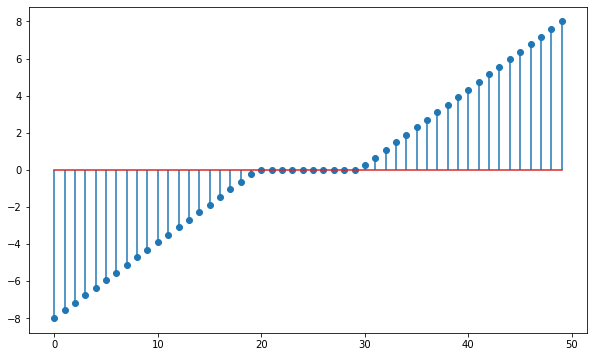

In [6]:
# Plot the output for t in [-10, 10] and lambda = 2
# Your code here:
t = np.linspace(-10,10)
lmbda = 2
plt.figure(figsize=(10, 6))

x_hat = SoftThresh(t, lmbda)
plt.stem(x_hat)

The effect of this function is often referred to as soft-thresholding or shrinkage. Describe what happens when $y$ is small compared to $\lambda$, and when $y$ is large. 

__A)__ 

___

Apply `SoftThresh` to the noisy signal $y$ with $\lambda = \{0.01, 0.05, 0.1, 0.2\}$, and include the plot for $\lambda = 0.1$ with your report. 

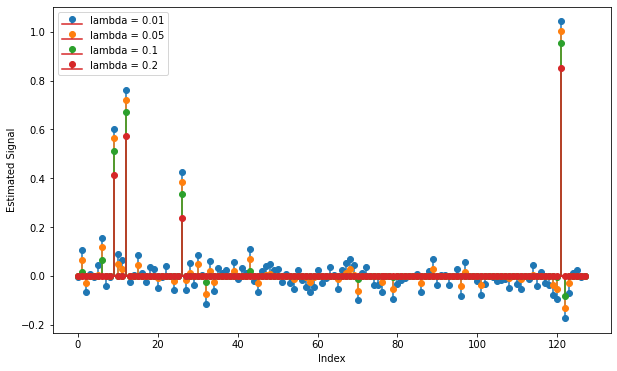

In [7]:
# Plot the resulting signals for lambda = [0.01, 0.05, 0.1, 0.2]
# Your code here:
lmbdas =[0.01, 0.05, 0.1, 0.2]
plt.figure(figsize=(10, 6))
for i, lmbda in enumerate(lmbdas): 
    x_hat = SoftThresh(y, lmbda)
    plt.stem(x_hat, label=f'lambda = {lmbda}', linefmt='C'+str(i), markerfmt='C'+str(i)+'o')

plt.xlabel('Index')
plt.ylabel('Estimated Signal')

plt.legend()
plt.show()





__Q)__ Is the solution sparse?

__A)__

___

### Random Frequency Domain Sampling and Aliasing

As we mentioned before, there is a strong
connection between compressed sensing and denoising. We'll now explore this connection and the importance of
incoherent sampling.

First, let's set up the undersampled data. Compute the unitary Discrete Fourier transform of the sparse signal, $X=Fx$, where $F$ is a Fourier transform operator:

    X = np.fft.fft(x);


In [8]:
# Your code here:
X = np.fft.fft(x)



 In compressed sensing, we undersample the measurements. Recall that compressed sensing requires an
		  incoherent measurement matrix. One good choice is the undersampled Fourier transform. With this choice, we are
		  measuring a subset of the Fourier transform of our signal, $X_u = F_u x$, where $F_u$ is a Fourier transform
		  evaluated only at a subset of frequency domain samples. This is an underdetermined system for which there are
		  infinitely many signals that yield a consistent solution. However, we do know that the original signal is
		  sparse, so there is hope that we will be able to reconstruct it.

Compressed sensing theory suggests random undersampling. To see why, we will look at equispaced undersampling
and compare it to random undersampling. Undersample $X$ by 4 by taking 32 equispaced samples. Compute the
inverse Fourier Transform, filling the missing data with zeros, and multiply by $4$ to correct for the fact that we only have $1/4$ of the samples.
          
    Xu = np.zeros(128, dtype='complex');
    Xu[::4] = X[::4]
    xu = np.fft.ifft(Xu) * 4
    
This is the minimum $\ell_2$ norm solution (why?). Plot the real part of the result.

<StemContainer object of 3 artists>

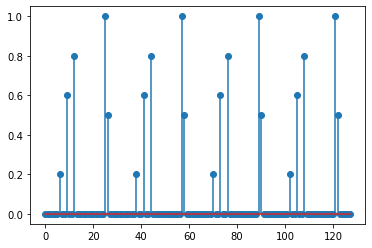

In [9]:
# Your code here:
X_u = np.zeros(128, dtype='complex')
X_u[::4] = X[::4]
xu = np.fft.ifft(X_u) * 4

plt.stem(np.real(xu))


__A)__ Describe what you see:

___

Will we be able to reconstruct the original signal from this minimum-norm solution?
Now undersample the data by taking 32 random samples. Compute the zero-filled inverse Fourier transform and
multiply by $4$ again,

    Xr = np.zeros(128, dtype='complex');
    prm = np.random.permutation(128) - 1
    Xr[ prm[:32] ] = X[ prm[:32] ];
    xr = np.fft.ifft(Xr) * 4
    
Plot the real part of the signal. 

<StemContainer object of 3 artists>

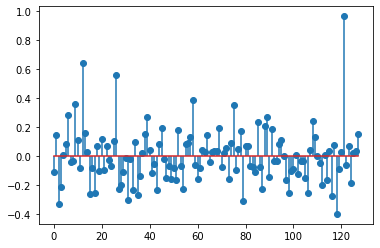

In [10]:
# Your code here:
Xr = np.zeros(128, dtype='complex')
prm = np.random.permutation(128) - 1
Xr[ prm[:32] ] = X[ prm[:32] ]
xr = np.fft.ifft(Xr) * 4

plt.stem(np.real(xr))


__Q)__ Describe what you see. Will we be able to reconstruct the original signal from the result? How does this resemble the denoising problem?

__A)__

___

This is the important part, so say it out loud: __By random undersampling, we’ve turned the ill-conditioned problem into a sparse signal denoising problem.__ However, the “noise” is not really noise, but incoherent aliasing that is contributed by the signal itself. Therefore, we might be able __EXACTLY__ recover the sparse signal.

###Reconstruction from Randomly Sampled Frequency Domain Data

Inspired by the denoising example, we
		  will add an $\ell_1$ penalty and solve
          
 $$ \hat x = \arg \min_x \frac{1}{2} ||F_ux - y||_2^2 + \lambda ||x||_1 $$
 
  In this case, $\hat x$ is the estimated sparse signal, $F_u\hat x$ is the undersampled Fourier transform of the
		  estimate, and $y$ are the observed samples of the Fourier transform (of the original sparse signal)
		  that we have acquired. Now all the
		  variables are coupled through the Fourier transform, and there is no closed-form solution. However, the
		  problem is convex and so there __is__ a global solution! We will arrive to the solution iteratively by
		  applying soft-thresholding and constraining data consistency. Let $\hat X = F\hat x$ be the Fourier transform of $\hat x$, we will initialize
		  $\hat X_0 = y$, and implement the following for the $i$'th iteration:


1. Compute the inverse Fourier transform to get an estimate of the signal, $\hat x_i = F^* \hat X_i$

2. Apply softthresholding on the signal $\hat x_i = \text{SoftThresh}(\hat x_i, \lambda)$ in the sparse signal domain

3. Compute the Fourier transform $\hat X_i = F\hat x_i$

4. Enforce data consistency for the measured observations in the frequency domain, that is
    - if $ y[j] = 0 $, $ \hat X_{i+1}[j] = \hat X_i[j] $
    - if $ y[j] \ne 0 $, $ \hat X_{i+1}[j] = y[j] $
                
5. Repeat until $||\hat x_{i+1} - \hat x_i ||_2 < \epsilon$

This is a Projection Onto Convex Sets (POCS) type algorithm. It is not a state-of-the art compressed sensing algorithm, but
it is intuitive to understand: at each iteration, we alternate between enforcing data consistency and
promoting sparsity. 

To implement the algorithm, we store the randomly sampled Fourier data in `Y`,
with zeros for the non-acquired data, ie we set `Y = Xr`. Then, we initialize the estimate of the Fourier transform of the signal to
be `Xi = Y`. The core of the iteration can then be written as

    xi = np.fft.ifft( Xi );  
    xi_st = SoftThresh(xi.real, lamb);  # Enforce sparsity
    Xi = np.fft.fft(xi_st); 
    Xi = Xi * (Y==0) + Y;  # Enforce data consistency
     
Note that we take the real part of $x$ before soft-thresholding because we know that our signal is real.

For the general complex case, the `SoftThresh` function has to be modified to return $$ (|y| - \lambda)_+ \frac{y}{| y |}$$ instead. __We will need this modification later when we deal with complex-valued MR images!!__

Apply the algorithm (at least $100$ iterations) to the undersampled signal with $\lambda=\{0.01, 0.05, 0.1\}$.
For each $\lambda$, also make a plot of error between the true $x$ and $\hat x$ as a function of the iteration number.

It is really cool to see the evolution of the intermediate result. To plot the signal at each iteration in python notebook,
you can use the following commands within the for loop:

    plt.clf()
    plt.stem(xi.real)
    plt.title( 'Iteration %d' % i )
    display.clear_output(wait=True)
    display.display(plt.gcf())


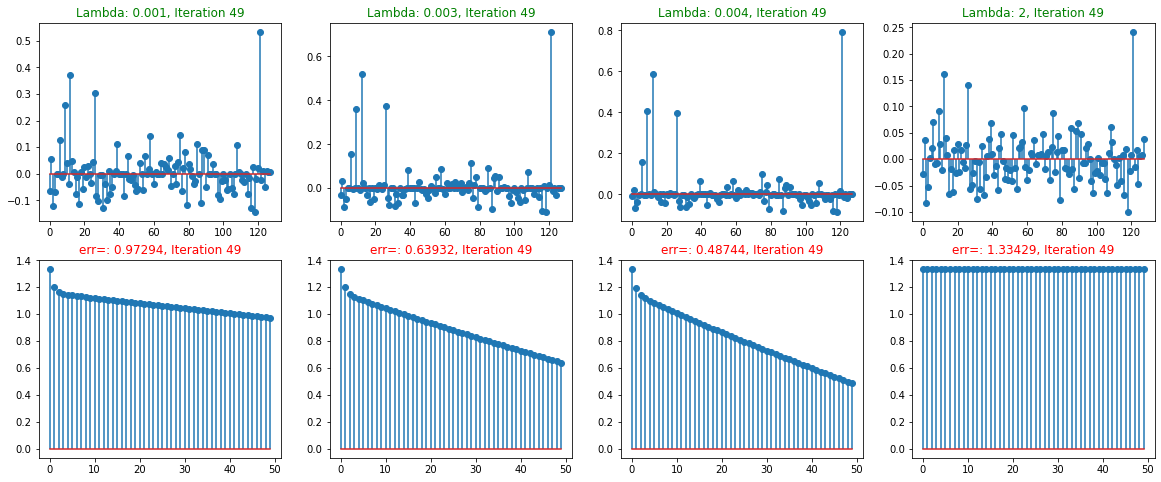

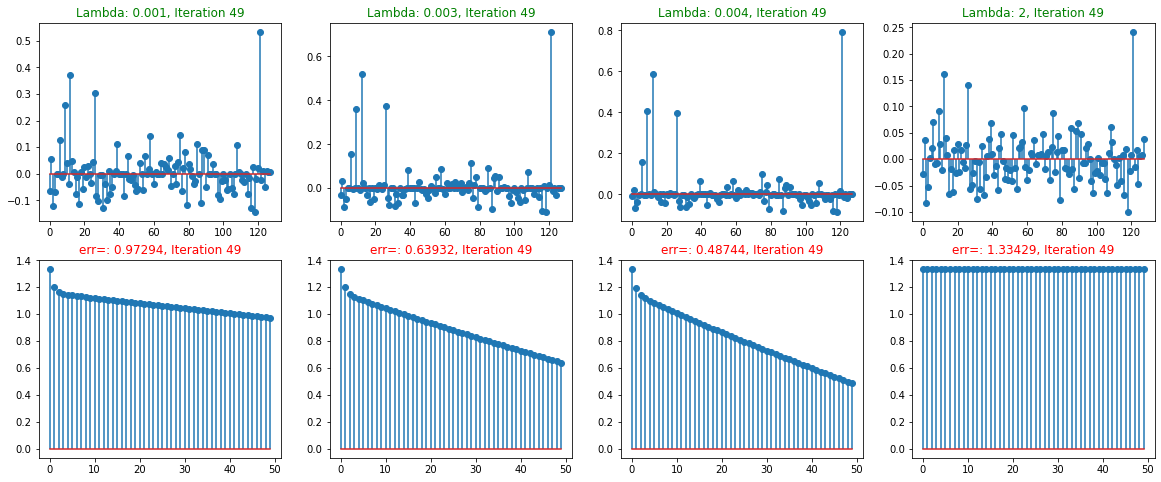

In [32]:
# Initialize Y and Xi
# Your code here:
Y = Xr
Xi = Y

# Initialize lamb and niter
# Your code here:
niter = 50
lambdas = [0.001, 0.003, 0.004, 2]

# Loop 
# Your code here:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for j, lamb in enumerate(lambdas):
    err = []
    ax1 = plt.subplot(2, 4, j + 1)
    ax2 = plt.subplot(2, 4, j + 1 + 4)
    Xi = Y
    for i in range(niter):
        xi = np.fft.ifft(Xi)
        xi_st = SoftThresh(xi.real, lamb)  # Enforce sparsity
        Xi = np.fft.fft(xi_st)
        Xi = Xi * (Y == 0) + Y  # Enforce data consistency

        ax1.clear()  # Clear the current subplot
        ax2.clear()  # Clear the current subplot

        # Your plotting logic here
        ax1.stem(xi.real)
        ax1.set_title(f'Lambda: {lamb}, Iteration {i}', color="green")

        err.append(np.round(np.linalg.norm(xi - x),decimals=5))
        ax2.set_title(f'err=: {err[-1]}, Iteration {i}', color="red")
        ax2.stem(err)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        





Now, repeat the iterative reconstruction for the equispaced undersampled signal by initializing `Y = Xu` What’s wrong?

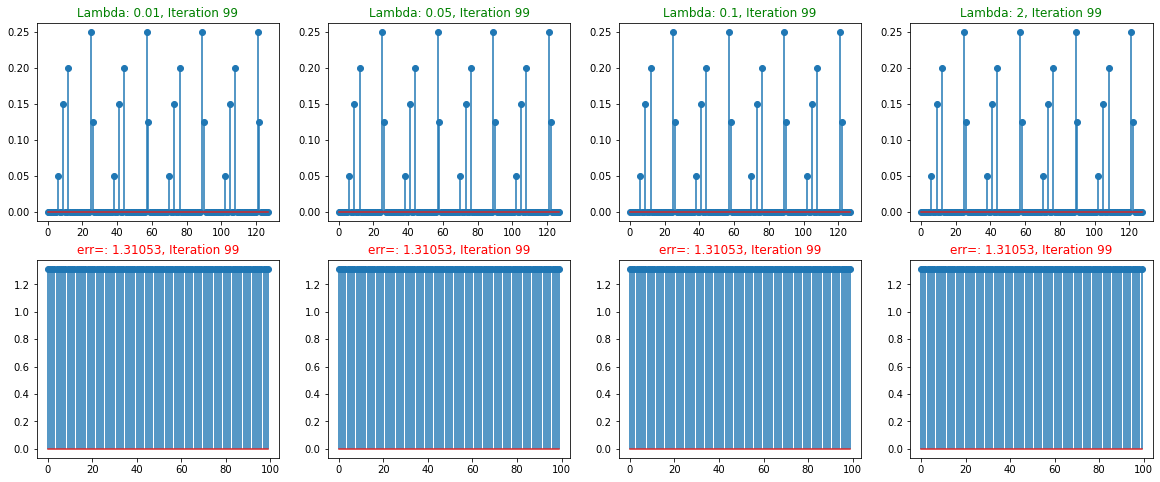

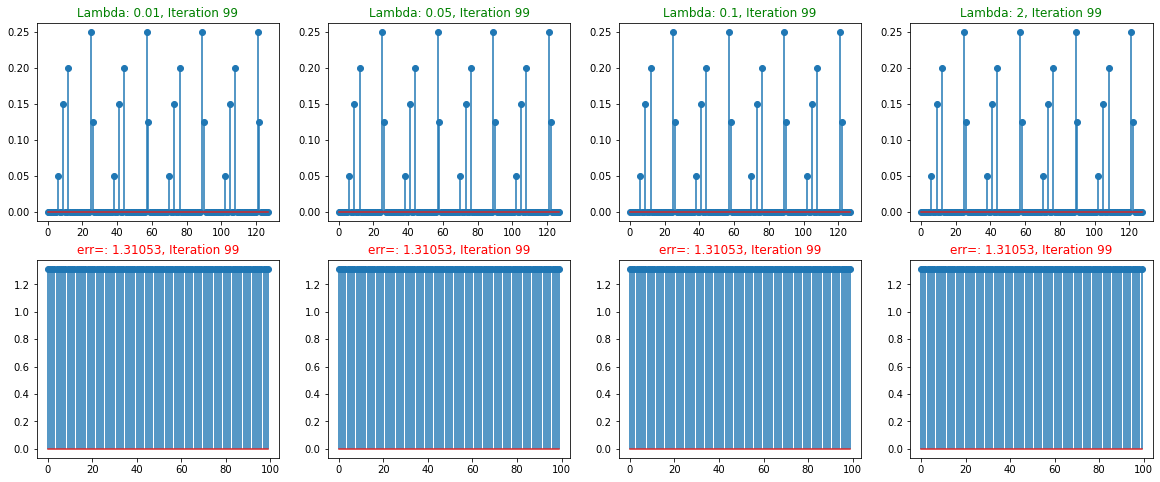

In [12]:
# Initialize Y and Xi
# Your code here:
Y = X_u
Xi = Y

# Initialize lamb and niter
# Your code here:
niter = 100
lambdas = [0.01, 0.05, 0.1, 2]

# Loop 
# Your code here:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for j, lamb in enumerate(lambdas):
    err = []
    ax1 = plt.subplot(2, 4, j + 1)
    ax2 = plt.subplot(2, 4, j + 1 + 4)
    Xi = Y
    for i in range(niter):
        xi = np.fft.ifft(Xi)
        xi_st = SoftThresh(xi.real, lamb)  # Enforce sparsity
        Xi = np.fft.fft(xi_st)
        Xi = Xi * (Y == 0) + Y  # Enforce data consistency

        ax1.clear()  # Clear the current subplot
        ax2.clear()  # Clear the current subplot

        # Your plotting logic here
        ax1.stem(xi.real)
        ax1.set_title(f'Lambda: {lamb}, Iteration {i}', color="green")

        err.append(np.round(np.linalg.norm(xi - x),decimals=5))
        ax2.set_title(f'err=: {err[-1]}, Iteration {i}', color="red")
        ax2.stem(err)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        

__A)__ What's wrong?

___

### Beyond Nyquist Rate: the Phase Transition Curve

We've seen that with the combination of sparsity, incoherent measurements and a sparsity based reconstruction, compressed sensing can exactly reconstruct a $5$-sparse signal with $4 \times$ undersampling. But how well does compressed sensing work with other sparsity level and undersampling factor? For bandlimited signals, we have the Nyquist rate guiding our sampling strategy. For compressed sensing we will instead look at the __phase transition diagram__.

The phase transition diagram is a 2D color plot that can characterize signal recovery performance. On its horizontal axis we have the undersampling factor $\delta = $( Number of measurements $n$ / Signal length $N$), and its vertical axis, we have the sparsity level $\rho = $( Number of nonzeros $k$/ Number of measurements $n$). At each point on the 2D plot, we assign the probability of exactly recovering the signal as its value (with a probability of 1 being what we want), so the resulting plot is a color plot.

In general, there will be a transition between a success region on the bottom right to a failure region on the top left in the phase transition diagram. This is because given the same number of measurements, more nonzeros in your signal will also make the recovery harder. Similarly, given the same sparsity level, less measurements will make the recovery harder.

For compressed sensing, it turns out there is a very sharp transition between success and failure in the phase transition diagram. Below the phase transition curve, we recover the signal __exactly with probability almost 1__. Above the phase transition curve, we can recover the signal __exactly with probability almost 0__. This transition curve essentially generalizes the Nyquist rate. Instead of depending on the signal bandwidth, our sampling rate now depends on the sparsity level.


<img src="https://inst.eecs.berkeley.edu/~ee123/sp15/hw/phase_transition.jpg" width="500">

The above figure shows a compressed sensing phase transition diagram from random Fourier measurements. This figure is taken from the paper *Observed universality of phase transitions in high-dimensional geometry, with implications for modern data analysis and signal processing* by Donoho and Tanner. For each point on the diagram, the authors generate 200 random instances of the compressed sensing problem and then calculate the frequency of success as the success rate. From the diagram, we can clearly see the phase transition curve, splitting the diagram into a success region and a failure region. The phase transition curve is theoretically justified, but the details are beyond the scope of the course.

In the following part, we will empirically generate a simple version of the phase transition diagram. Instead of generating $200$ instances and assigning the probability of success, for each point in the diagram, we will assign the normalized mean square error between the recovered signal and the original signal for $8$ compressed sensing problem instances. We will consider a length $128$ signal and a $32 \times 32$  discretized phase transition diagram. For each $\delta$ and $\rho$, we will do the following four steps:
- Randomly generate a sparse vector according to $\rho$
- Take random measurements in the Fourier domain according to $\delta$
- Reconstruct the signal using the iterative reconstruction algorithm
- Compute the normalized error with the original sparse vector. 

For convenience, first create a function `x_rec = cs_recon( Y, lamb, niter)` that takes in the randomly subsampled Fourier measurements `Y`, the threshold `lamb` and the number of iterations `niter` and returns the iteratively reconstructed signal `x_i`

In [13]:
# Compressed sensing reconstruction function
def cs_recon( Y, lamb, niter ):
    # Your code here:
    Xi = Y
    xi = 0
    for i in range(niter):
        xi = np.fft.ifft(Xi)
        xi_st = SoftThresh(xi.real, lamb)  # Enforce sparsity
        Xi = np.fft.fft(xi_st)
        Xi = Xi * (Y == 0) + Y  # Enforce data consistency

    return xi

    
    

Next, initialize the phase transition matrix as a $32 \times 32$ zero matrix. We will consider a scaled version of $\delta$ and $\rho$ by $N=128$ and loop through $32$ steps from $0$ to $127$. For each $\delta$ and $\rho$, you should generate a randomly signed $k$-sparse vector with $k = \rho  \delta / 128$:
        
        # Generate signal and spectrum
        k = np.floor(rho * delta / 128)
        x_orig = np.append( np.sign(np.random.randn(k)) , np.zeros( (1,128-k) ) )
        x_orig = x_orig[ np.random.permutation(128) - 1 ];
        X_orig = np.fft.fft(x_orig)

Then generate a randomly undersampled spectrum $Y$ with $\delta$ number of measurements and reconstruct it just as we did in the first part of the exercise. Use $\lambda = 0.05$ and $30$ iterations. After reconstruction, add the normalized mean squared error to each point of the phase transition diagram:

        phase_transition[rho / 4, delta / 4] += np.linalg.norm( x_rec - x_orig ) / (np.linalg.norm( x_orig ) + 1e-5)
        
Do the above steps $8$ times and divide the resulting `phase_transition` by $8$. Your resulting code should have 3 for loops.
        
Generate the phase transition matrix and plot it using `plt.imshow()`. Note that it may take a while to generate the matrix. If you are impatient, you can put a print statement after the first for loop.



In [14]:
# Initialize phase transition matrix
phase_transition = np.zeros((32,32))

# Initialize lamb and niter
# Your Code Here:
lamb = 0.05
niter = 30

# Loop through iterations
# Loop delta and rho from 1 to 127 in 32 steps
# 1. Generate signal and spectrum
# 2. Random undersample
# 3. Reconstruct
# 4. Compute normalized error

# Your Code Here:

for _ in range(8):
    for rho in np.linspace(0,127,32):
        for delta in np.linspace(0, 127, 32):
            # Generate signal and spectrum
            k = int(np.floor(rho * delta / 128))
            x_orig = np.append( np.sign(np.random.randn(k)) , np.zeros( (1,128-k) ) )
            x_orig = x_orig[ np.random.permutation(128) - 1 ]
            X_orig = np.fft.fft(x_orig)
            
            X_undersampled = np.zeros(128, dtype='complex')
            prm = np.random.permutation(128) - 1
            X_undersampled[ prm[:int(delta)] ] = X_orig[ prm[:int(delta)] ]
            Y = X_undersampled 

            x_rec = cs_recon( Y, lamb, niter )

            phase_transition[int(rho / 4), int(delta / 4)] += np.linalg.norm( x_rec - x_orig ) / (np.linalg.norm( x_orig ) + 1e-5)
        
            
phase_transition = phase_transition / 8  

Text(0, 0.5, 'Sparsity (k) / Measurements (n)')

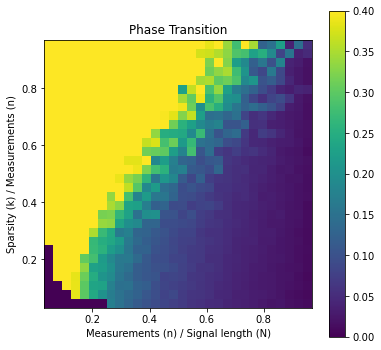

In [15]:
# Plot phase transition matrix
plt.figure(figsize=(6, 6))
plt.imshow(phase_transition[1:-1,1:-1], origin='lower',  extent = (0.03125, 1-0.03125, 0.03125, 1-0.03125), vmax = 0.4)
plt.colorbar()
plt.title( 'Phase Transition' )
plt.xlabel('Measurements (n) / Signal length (N)')
plt.ylabel('Sparsity (k) / Measurements (n)')

__Q)__ Do you see a phase transition? Is it as precise as the paper figure? Why and why not? Does it match your expectation?

__A)__

___

Note that because we are only doing one problem instance at a single point, this is a very coarse version of the phase transition curve. Luckily we have ~50 people in the class. Each person will generate a different random instance, and by averaging, we can get a more accurate phase transition diagram.

Save the phase transition matrix with `np.save()` and submit it along this python notebook. After collecting all the reports, we will average the matrices from everyone and hopefully get a more precise phase transition diagram!

In [16]:
#np.save('phase_transition',phase_transition)

## Medical Image Sparsity

Even without noise, medical images are generally not sparse. However, like natural images, medical images have a sparse representation in a transform domain, such as the wavelet domain. Here we will use the [PyWavelets](http://www.pybytes.com/pywavelets/index.html) package to perform wavelet transforms. You can install the package with the command

```
pip install PyWavelet
```


In [17]:
import pywt
plt.rcParams['figure.figsize'] = (16, 16)

The PyWavelet package does not provide nice functions for visualizing the wavelet transforms. To do this, we need to define functions that stack and unstack the approximation and detail coefficients, as well as scale the different levels when displaying an image. We provide you this functionality with the code below

In [18]:
def imshowgray(im, vmin=None, vmax=None):
    plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=vmin, vmax=vmax)

    
def wavMask(dims, scale):
    sx, sy = dims
    res = np.ones(dims)
    NM = np.round(np.log2(dims))
    for n in range(int(np.min(NM)-scale+2)//2):
        res[:int(np.round(2**(NM[0]-n))), :int(np.round(2**(NM[1]-n)))] = \
            res[:int(np.round(2**(NM[0]-n))), :int(np.round(2**(NM[1]-n)))]/2
    return res


def imshowWAV(Wim, scale=1):
    plt.imshow(np.abs(Wim)*wavMask(Wim.shape, scale), cmap = plt.get_cmap('gray'))

    
def coeffs2img(LL, coeffs):
    LH, HL, HH = coeffs
    return np.vstack((np.hstack((LL, LH)), np.hstack((HL, HH))))


def unstack_coeffs(Wim):
        L1, L2  = np.hsplit(Wim, 2) 
        LL, HL = np.vsplit(L1, 2)
        LH, HH = np.vsplit(L2, 2)
        return LL, [LH, HL, HH]

    
def img2coeffs(Wim, levels=4):
    LL, c = unstack_coeffs(Wim)
    coeffs = [c]
    for i in range(levels-1):
        LL, c = unstack_coeffs(LL)
        coeffs.insert(0,c)
    coeffs.insert(0, LL)
    return coeffs
    
    
def dwt2(im):
    coeffs = pywt.wavedec2(im, wavelet='db4', mode='per', level=4)
    Wim, rest = coeffs[0], coeffs[1:]
    for levels in rest:
        Wim = coeffs2img(Wim, levels)
    return Wim


def idwt2(Wim):
    coeffs = img2coeffs(Wim, levels=4)
    return pywt.waverec2(coeffs, wavelet='db4', mode='per')

Before we dive into wavelet transforms, we need a nice image to perform the tests. The provided brain.npz file from the webpage has a very pretty brain image (note it is complex-valued!). Run the cell below to load this and other data, explained later.

In [19]:
data = np.load('brain.npz')
im, mask_unif, mask_vardens, pdf_unif, pdf_vardens = \
data['im'], data['mask_unif'], data['mask_vardens'], data['pdf_unif'], data['pdf_vardens'], 

Here's an example of how to compute a Daubechies wavelet transform, display it, and reconstruct it again:

Reconstruction error: 7.266077376996008e-14


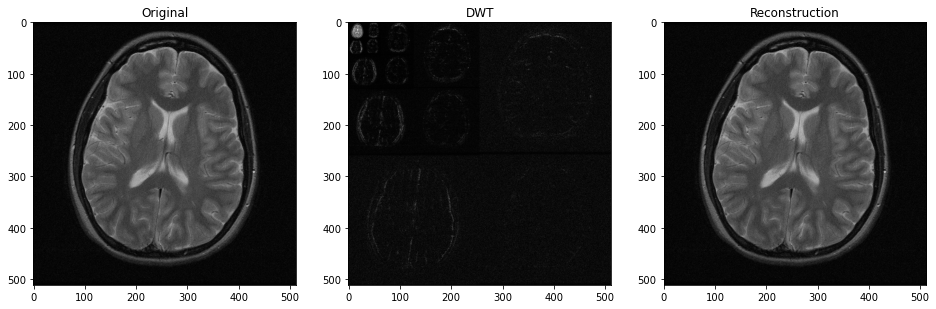

In [20]:
Wim = dwt2(im)
im2 = idwt2(Wim)

plt.subplot(1,3,1)
imshowgray(np.abs(im))
plt.title('Original')

plt.subplot(1,3,2)
imshowWAV(Wim)
plt.title('DWT')

plt.subplot(1,3,3)
imshowgray(np.abs(im2))
# imshowgray(np.abs(np.abs(im2) - np.abs(im)))
plt.title('Reconstruction')

print('Reconstruction error:', np.linalg.norm(im - im2))



We will now evaluate the sparse approximation of the brain image. Wavelet coefficients represent both space and spatial frequency information. Each band of wavelet coefficients represents a scale (frequency band) of the image. The location of the wavelet coefficient within the band represents its location in space. What you see are edges of the image at different resolutions and directions. Threshold the wavelet coefficients retaining only the largest 20% of the coeffi- cients. You can threshold im W for the largest fraction `f` of the coefficients with

    m = np.sort(abs(Wim.ravel()))[::-1]
    ndx = int(len(m) * f)
    thr = m[ndx]
    Wim_thr = Wim * (abs(Wim) > thr)
    
Plot the masked wavelet coefficients. What has been thresholded?


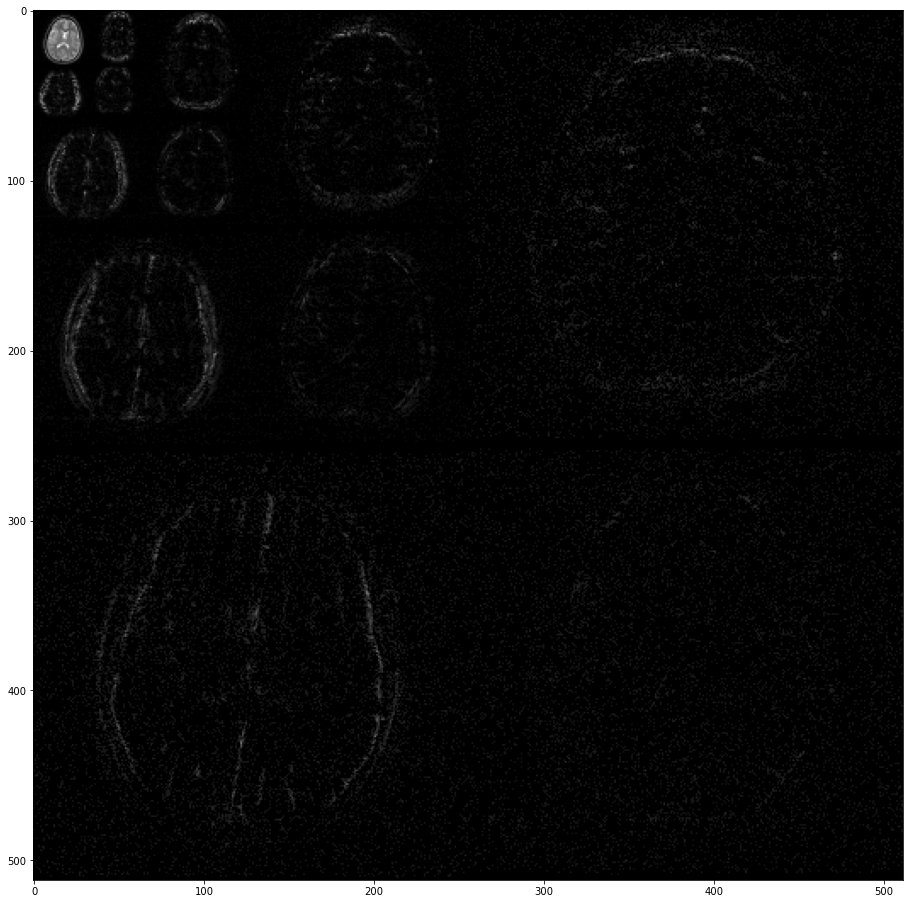

In [21]:
def WimTrhesher(Wim, ratio):
    ## Code to threshold and display the wavelet coefficients
    m = np.sort(abs(Wim.ravel()))[::-1]
    ndx = int(len(m) * ratio)
    thr = m[ndx]
    Wim_thr = Wim * (abs(Wim) > thr)
    
    return Wim_thr

imshowWAV(WimTrhesher(Wim, 0.2))

Reconstruct the image and display it. Compare it to the original image qualitatively and by computing the difference image. What has been removed? Examine the results when you retain the largest 12.5%, 10%, 5% and 2.5% of the coefficients. What, in your opinion, is the sparsity level of the image? Provide a reconstruction and difference image to support your argument.

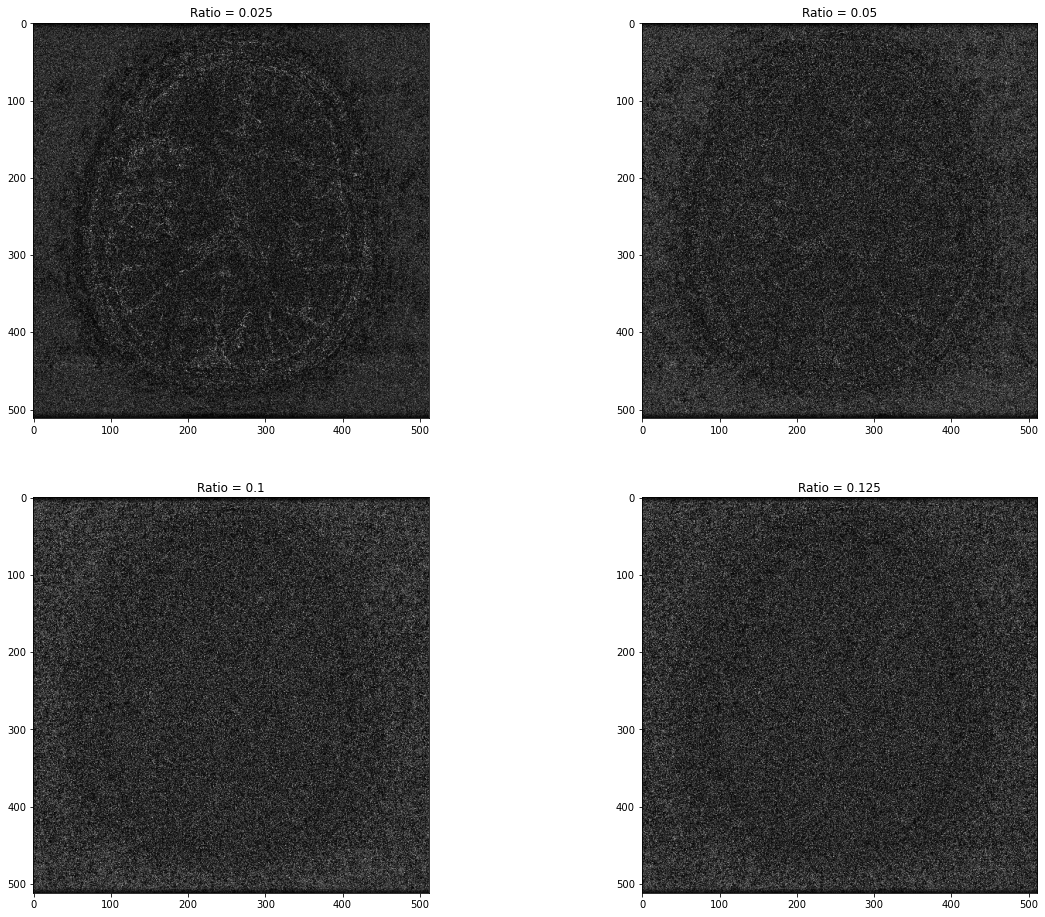

In [22]:
## Your code here
fig = plt.figure(figsize=(20,16))
ratios = [ 0.025, 0.05, 0.1, 0.125]
for i, ratio in  enumerate(ratios):
     Wim_thr = WimTrhesher(Wim, ratio)
     im_rec = idwt2(Wim_thr)

     diff_mat = np.abs(im_rec) - np.abs(im)

     plt.subplot( 2, int(len(ratios) / 2), i + 1)
     imshowgray(np.abs(diff_mat))
     plt.title(f'Ratio = {ratio}')

__Your Explanation:__
 with 2.5% we still see in the difference image the brain it self, we would like the difference image to look like noise as much as possible. That will mean that the reconstruction is basiclly the original image + noise caused by the thresholding in Wavelet domain. It looks like qualitatively that the sparsity level is 12.5% since we barely see any valuable edges of the brain.
 

## Compressed Sensing MRI

We'll now explore 2D compressed sensing reconstruction from under-sampled data. The brain.npz file contains additional data, which we have already loaded

### Non-uniform random sampling
An important aspect of random frequency-domain sampling is matching the power spectrum of the image. Since the energy in many images is concentrated in lower spatial frequnecies, more samples should be allocated there. We have provided two 3-fold undersam-pling masks for you. The random masks are in the variables `mask_unif` and `mask_vardens` and were drawn from probability density functions (PDF) given by the variables `pdf_unif` and `pdf_vardens`, respectively.
Compute the 2D Fourier transform of the image using a centered 2D FFT. Multiply by the uniform mask, divide by the appropriate PDF (called density compensation), and compute the zero-filled Fourier transform:

    M = fft2c(im);
    Mu = (M * mask_unif) / pdf_unif;
    imu = ifft2c(Mu);
    
Display the image and the difference image compared to original image. Is the aliasing white
random noise? Repeat for the variable density mask. What happened now? Both use a similar
number of samples, but which gives you a better reconstruction?

In [23]:
def fft2c(x):
    return 1 / np.sqrt(np.prod(x.shape)) * np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(x)))

def ifft2c(y):
    return np.sqrt(np.prod(y.shape)) * np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(y)))

Text(0.5, 1.0, 'Difference Variable')

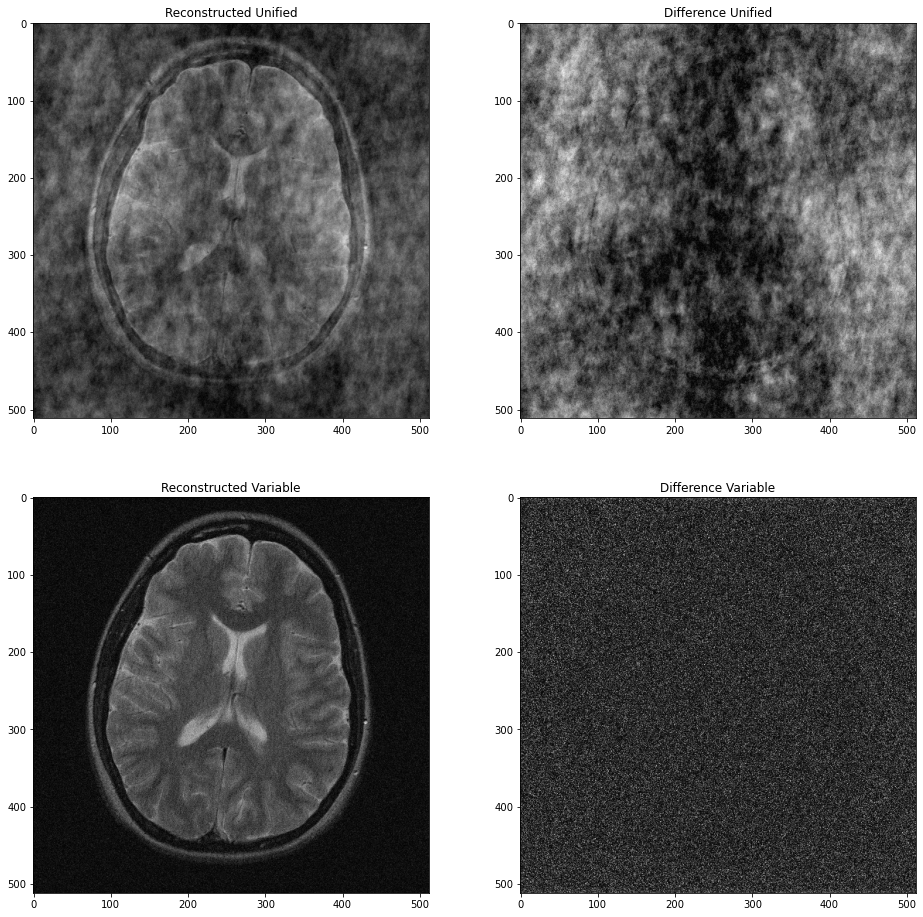

In [24]:
## Your code here

M = fft2c(im)

Mu = (M * mask_unif) / pdf_unif
imu = ifft2c(Mu)

plt.subplot(2,2,1)
imshowgray(np.abs(imu))
plt.title("Reconstructed Unified")

plt.subplot(2,2,2)
imshowgray(np.abs(np.abs(imu) - np.abs(im)))
plt.title("Difference Unified")

Mu = (M * mask_vardens) / pdf_vardens
imu = ifft2c(Mu)

plt.subplot(2,2,3)
imshowgray(np.abs(imu))
plt.title("Reconstructed Variable")

plt.subplot(2,2,4)
imshowgray(np.abs(np.abs(imu) - np.abs(im)))
plt.title("Difference Variable")

__Your Explanation:__

Variable density that suits the signal spectrum keeps important data and the aliasing is formed as noise, while in the other case when undersampling uniformly we get aliasing that doesn't look as noise because we lose information and assume equivilance in importance of all frequencies.

### Reconstruction from Random Sampled k-Space Data

Extend your 1D POCS algorithm for 2D images. Add another step of computing the wavelet transform before the soft-thresholding and the inverse wavelet transform after the soft-thresholding. Make sure that your `SoftThresh` function works for complex-valued data, as was mentioned earlier. 

Reconstruct the images from both the uniform and the variable density under-sampled data. First get an idea of reasonable values for $\lambda$ by examining what would be thresholded. You can do this using

    Wimu = dwt2(imu)
    imshowgray(abs(Wimu) > lambda)
    
Don't use `imshowWAV` for this, since it will scale the different wavelet levels differently. You want a significant number of coefficients to be below $\lambda$, but not so many that too much detail will be lost!

Start with the variable density data, and experiment with several values of $\lambda$. You should only
need about 20 iterations, but start with fewer while you convince yourself it is working! Compare
the result after soft-thresholding to a zero-filled density compensated reconstruction, the original
image, and a the original image soft-thresholded. As an initial image to the POCS, use a zero-filled
density compensated reconstruction, as it will converge faster. Show the image, and the difference
image for the $\lambda$ you find the most effective.

Then try the uniform density data. Run for at least 50-100 iterations, since this converges
slowly. If you want to speed up the convergence, start with a relatively large $\lambda$ so that the recon
will converge rapidly. Then, decrease $\lambda$ using the previous recon as an initial image. For example,
you might divide $\lambda$ by two every 10 or 20 iterations (this is called continuation). Show the image, and the difference
image for the $\lambda$ (or the final $\lambda$ if you use a sequence) that you find the most effective. Don’t spend
too much time on this, the point should be clear by now.

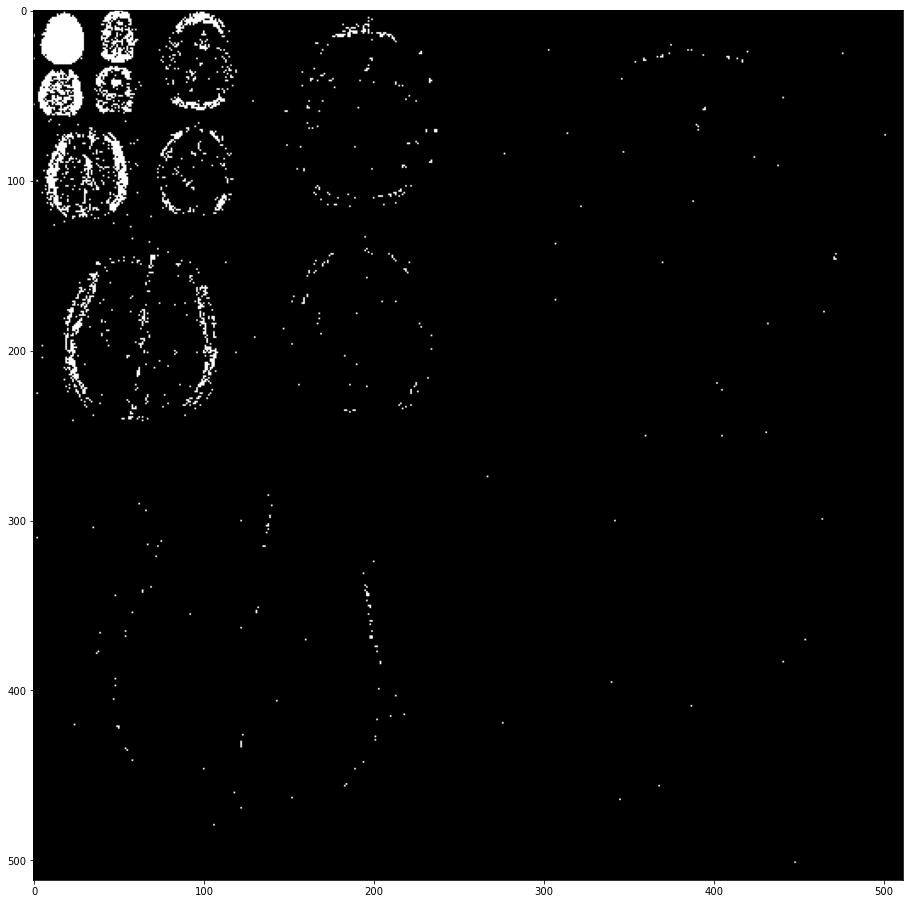

In [25]:
Mu = (M * mask_vardens) / pdf_vardens
imu = ifft2c(Mu)

Wimu = dwt2(imu)
imshowgray(abs(Wimu) > 0.20)

In [26]:
def SoftThreshModified(y, t):
    # SoftThreshModified -- Apply Soft Threshold to y; t thresh.
    # Usage:
    # xhat = SoftThresh(y, t)
    # Output:
    # xhat  =   sign(y)(|y|-t)_+
    # Original:
    #     xhat = np.zeros(len(y))
    #     xhat[y < -t] = y[y < -t] - t
    #     xhat[y > t] = y[y > t] + t
    #     return xhat
    xhat = np.zeros(y.shape)
    xhat[np.where(abs(y) > t)] = ((abs(y)[np.where(abs(y) > t)] - t) / (abs(y)[np.where(abs(y) > t)]))
    return xhat*y

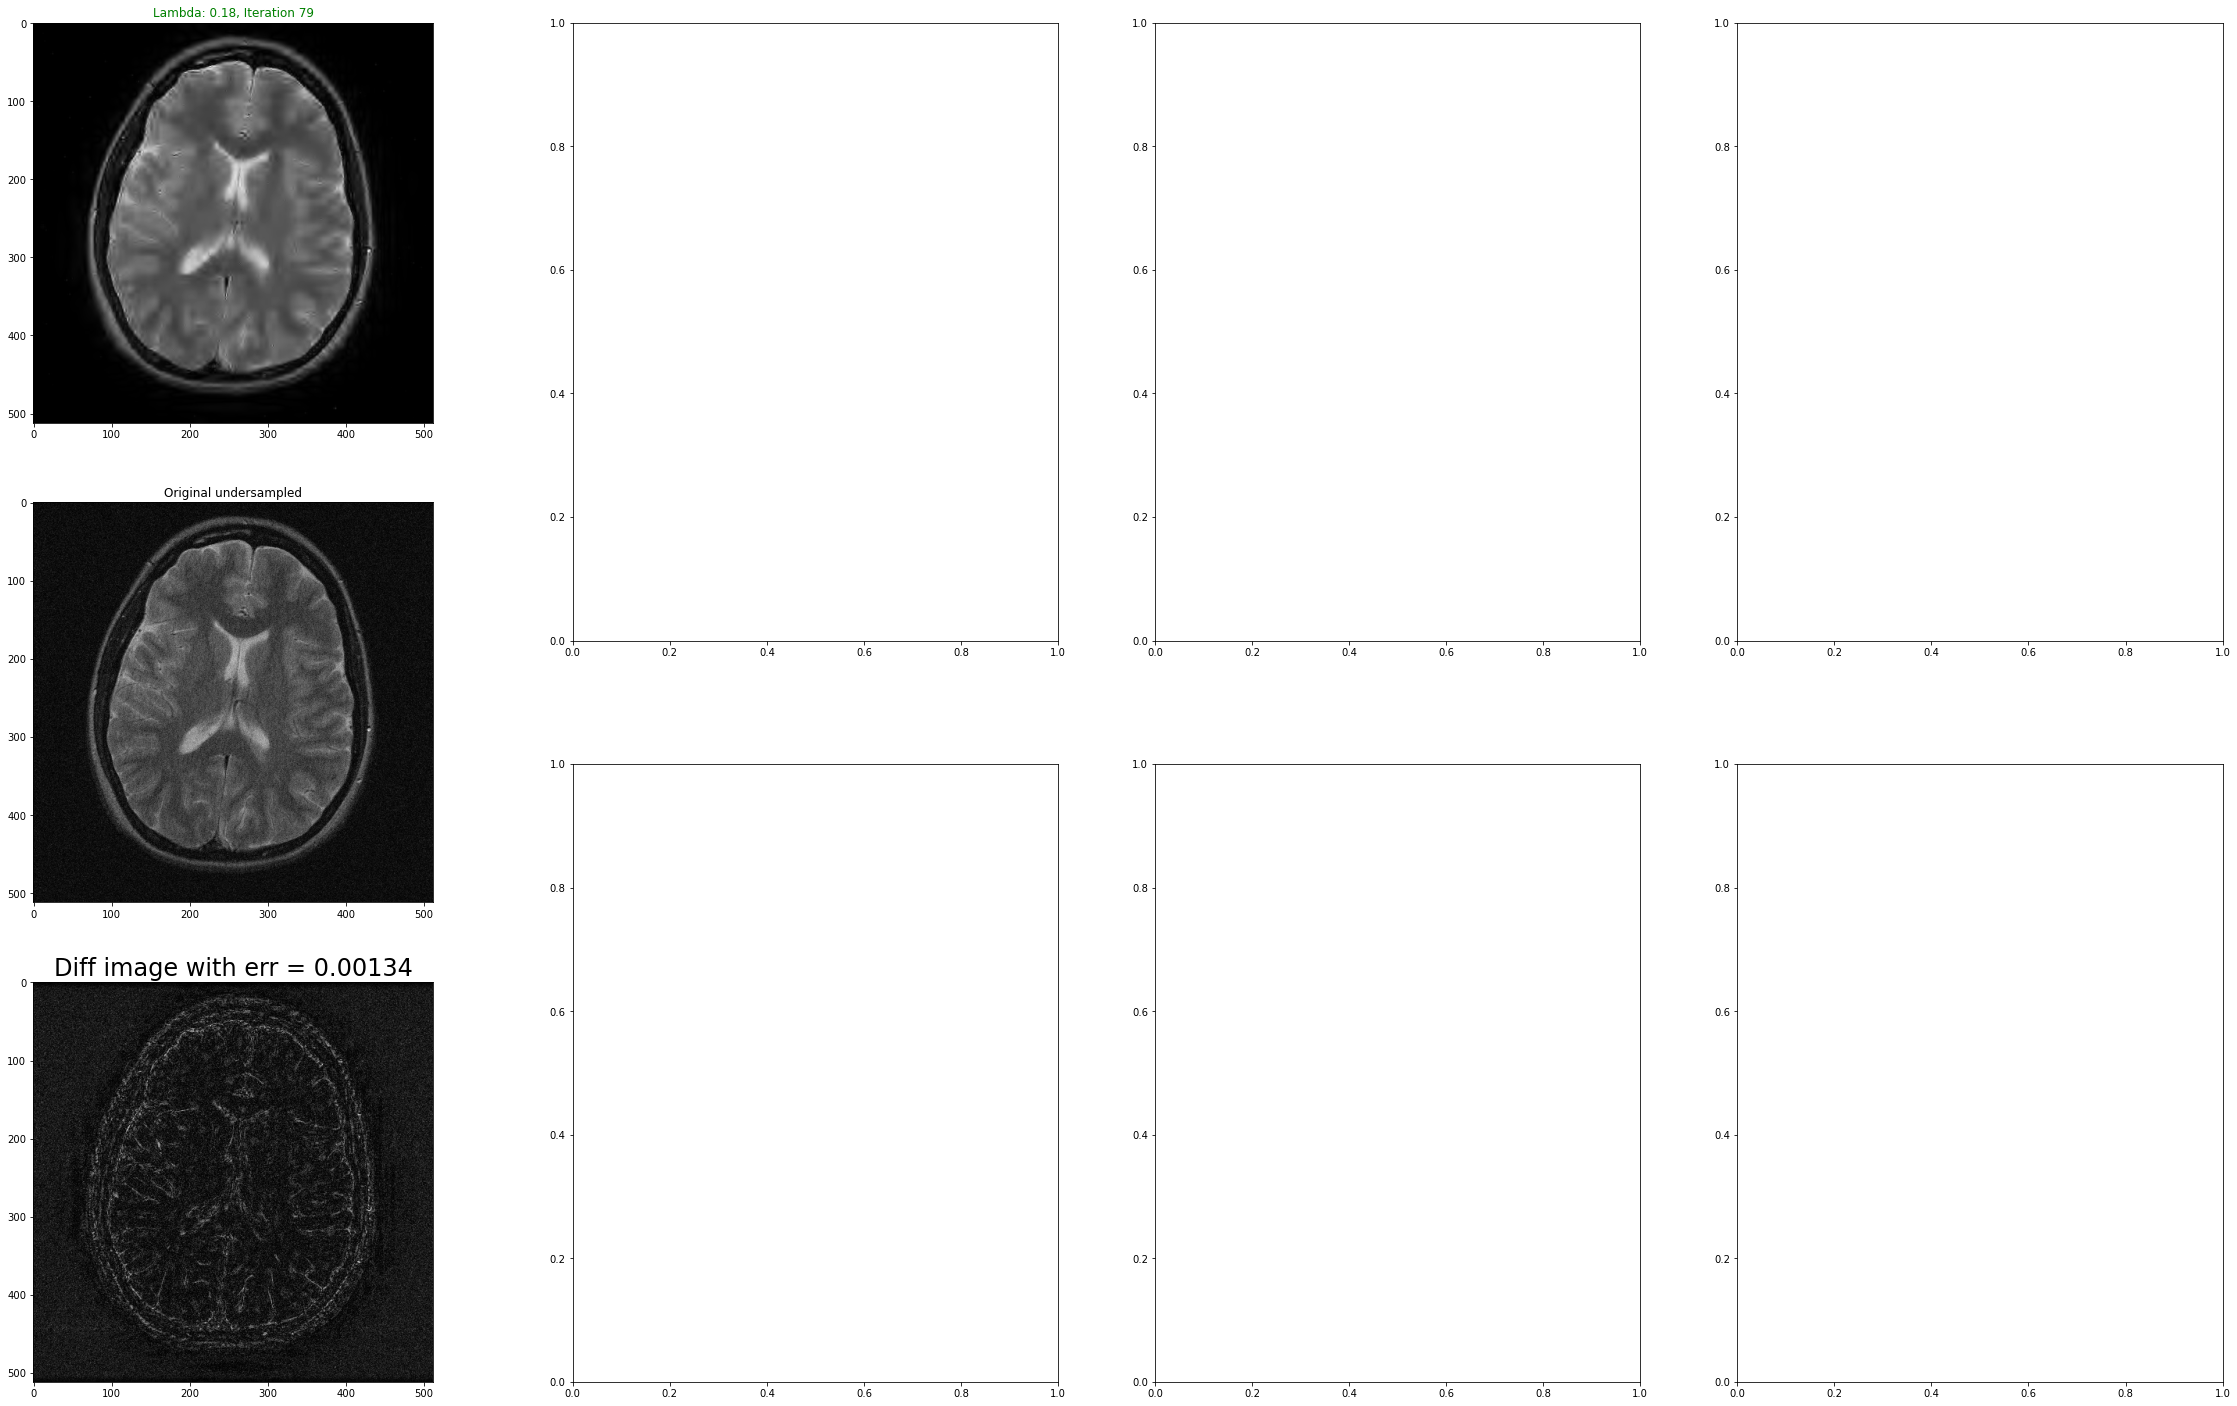

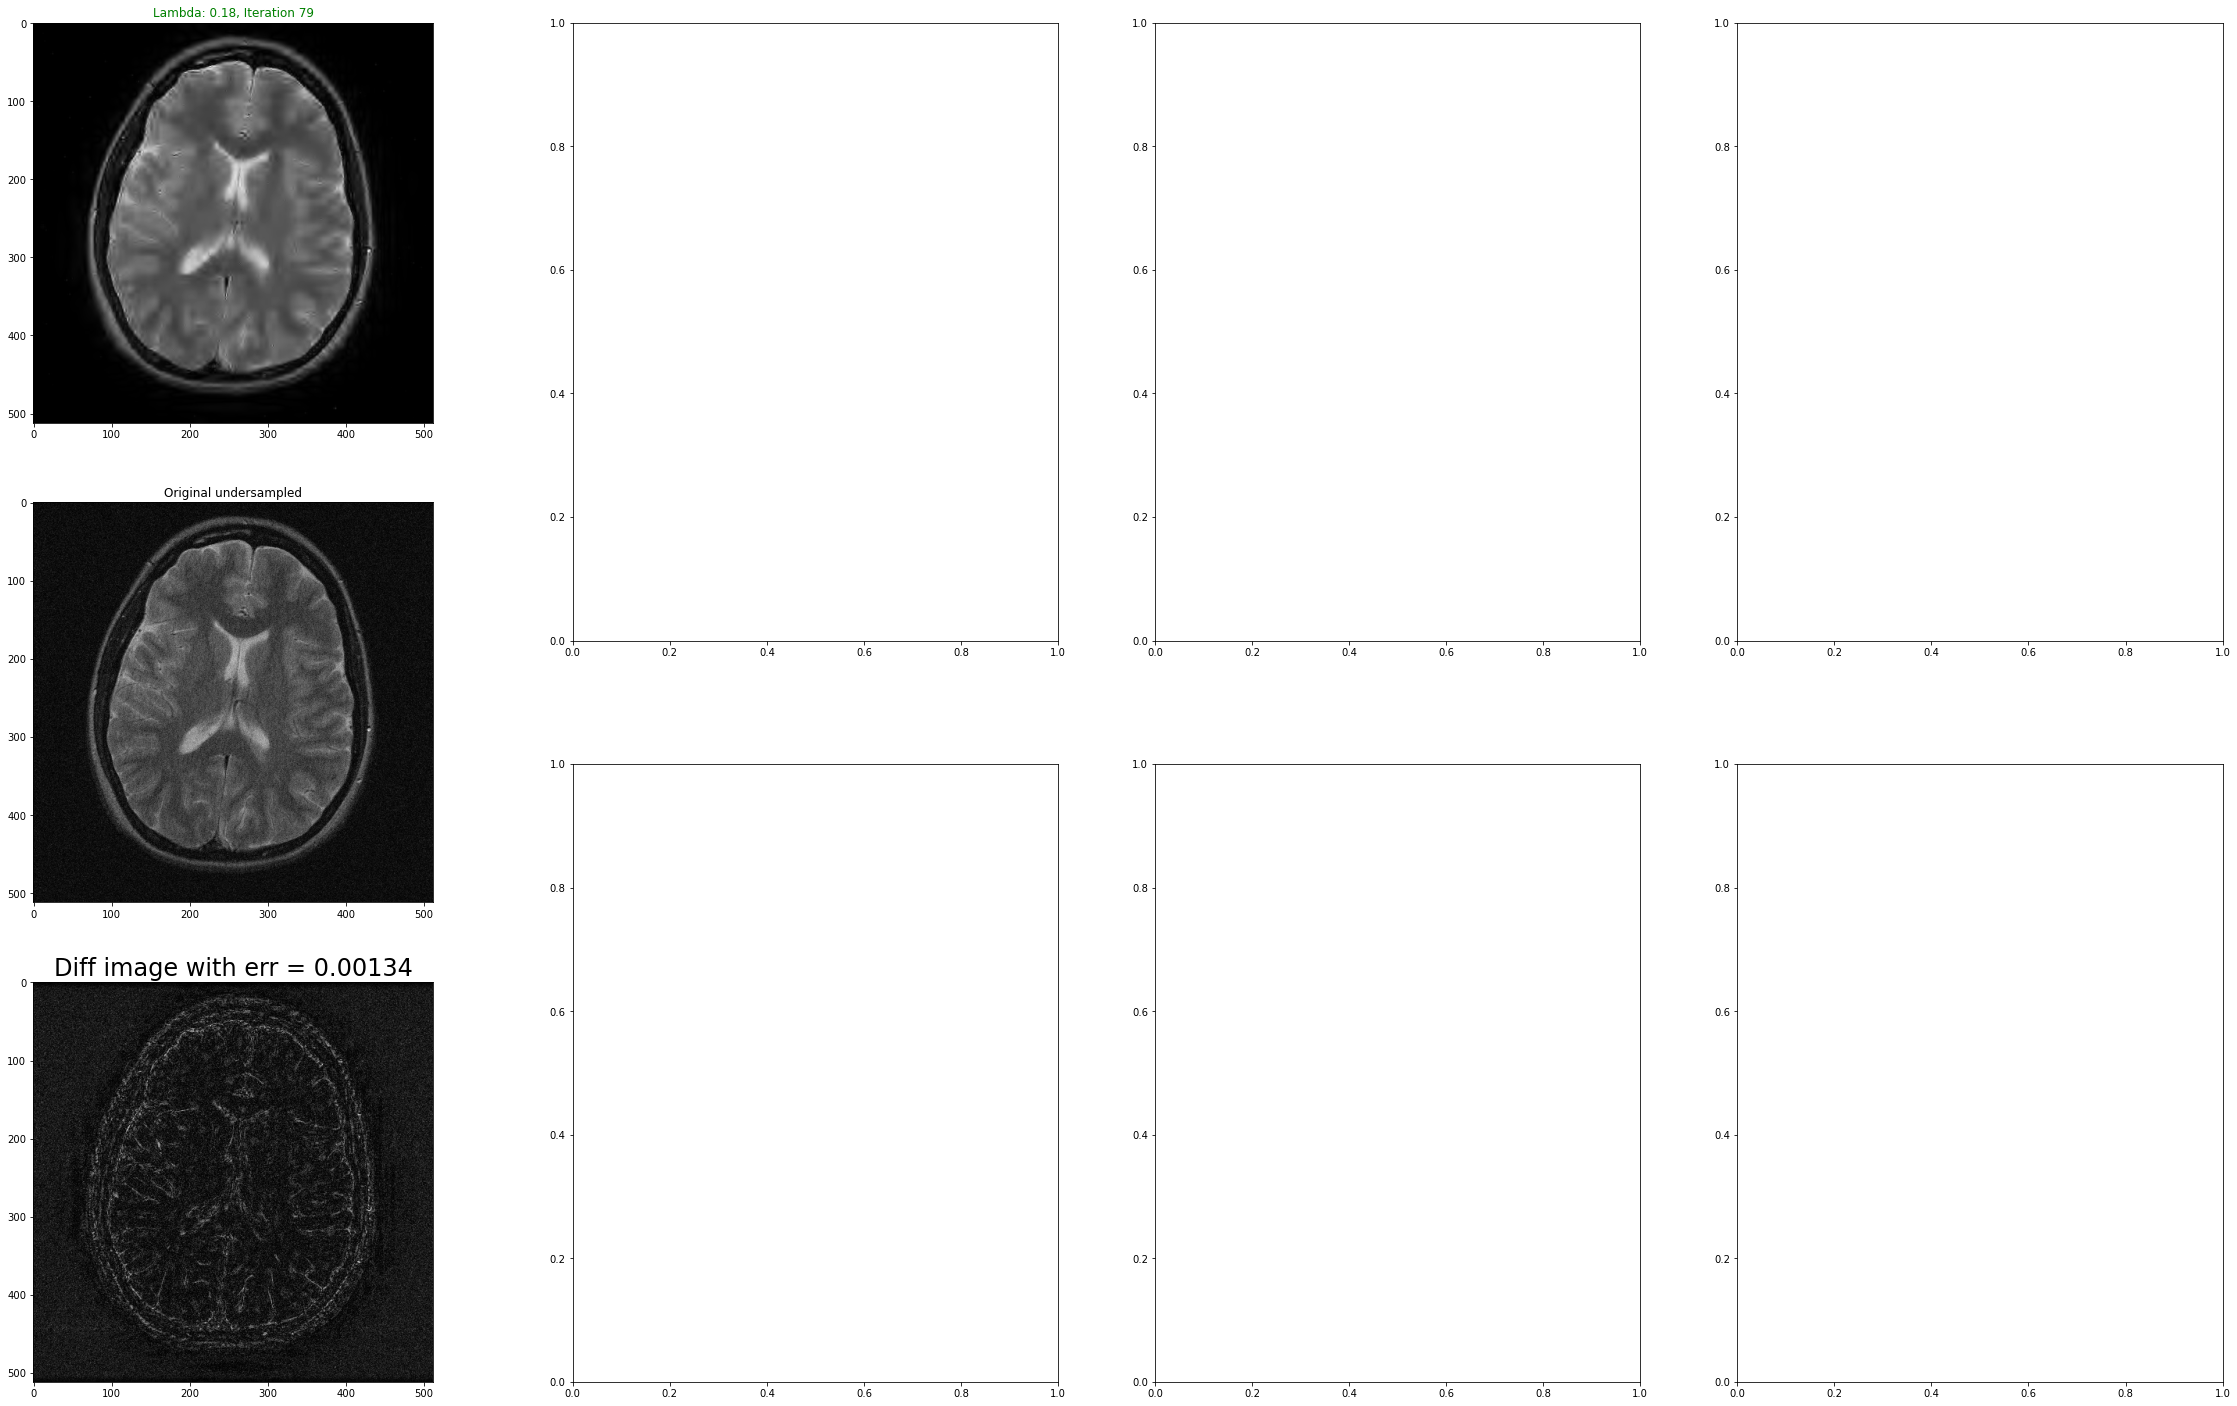

In [27]:
# Initialize Originals Y, K-space image
# Mu = (M * mask_unif) / pdf_unif
# imu = ifft2c(Mu)
Mu = (M * mask_vardens) / pdf_vardens # K-Space Undersampled Origianl Image.
Y = np.copy(Mu)

# Initialize lamb and niter
# Your code here:
niter = 80
lambdas = [0.18]

# Loop 
# Your code here:

fig, axes = plt.subplots(2, 4, figsize=(40,25))
for j, lamb in enumerate(lambdas):
    err = []

    # Initialize the iteration updated K-space to the first original undersaampled fourier domain image.
    Mu_i = np.copy(Y) 

    for i in range(niter):
        im_i = ifft2c(Mu_i) # Reconstructed image after inverse fourier
        Wim_i = dwt2(im_i) # Compute Wavelet transform where Image is sparse and we should use SoftThresh.
        Wim_st_i = SoftThreshModified(Wim_i, lamb)  # Enforce sparsity in the sparse domain (denoising)
        im_i = idwt2(Wim_st_i) # Reconstruct from Sparse domain
        Mu_i = fft2c(im_i) # Compute Inchorency domain for the last part of data consistency between the K-space Mu original and Mu_i.
        Mu_i = Mu_i * (Y == 0) + Y  # Enforce data consistency

        ax1.clear()  # Clear the current subplot
        
        # Image
        ax1 = plt.subplot(3, 4, (j + 1))
        ax1.imshow(np.abs(im_i), cmap=plt.get_cmap('gray'))
        ax1.set_title(f'Lambda: {lamb}, Iteration {i}', color="green")

        # Imshow original brain image for comparison with result
        ax1 = plt.subplot(3, 4, 4 + (j + 1))
        ax1.imshow(np.abs(imu), cmap=plt.get_cmap('gray'))
        ax1.set_title(f"Original undersampled")

        # Flatten the 2D arrays if necessary
        original_image_flat = im.flatten()
        reconstructed_image_flat = im_i.flatten()

        mse = np.mean((np.abs(original_image_flat) - np.abs(reconstructed_image_flat)) ** 2)

        diff_i = np.abs(np.abs(im) - np.abs(im_i))    
        ax1 = plt.subplot(3, 4, 8 + (j + 1))
        ax1.imshow(diff_i, cmap="gray")
        ax1.set_title(f"Diff image with err = {np.round(mse, decimals=5)}", fontsize=24)

        display.clear_output(wait=True)
        display.display(plt.gcf())

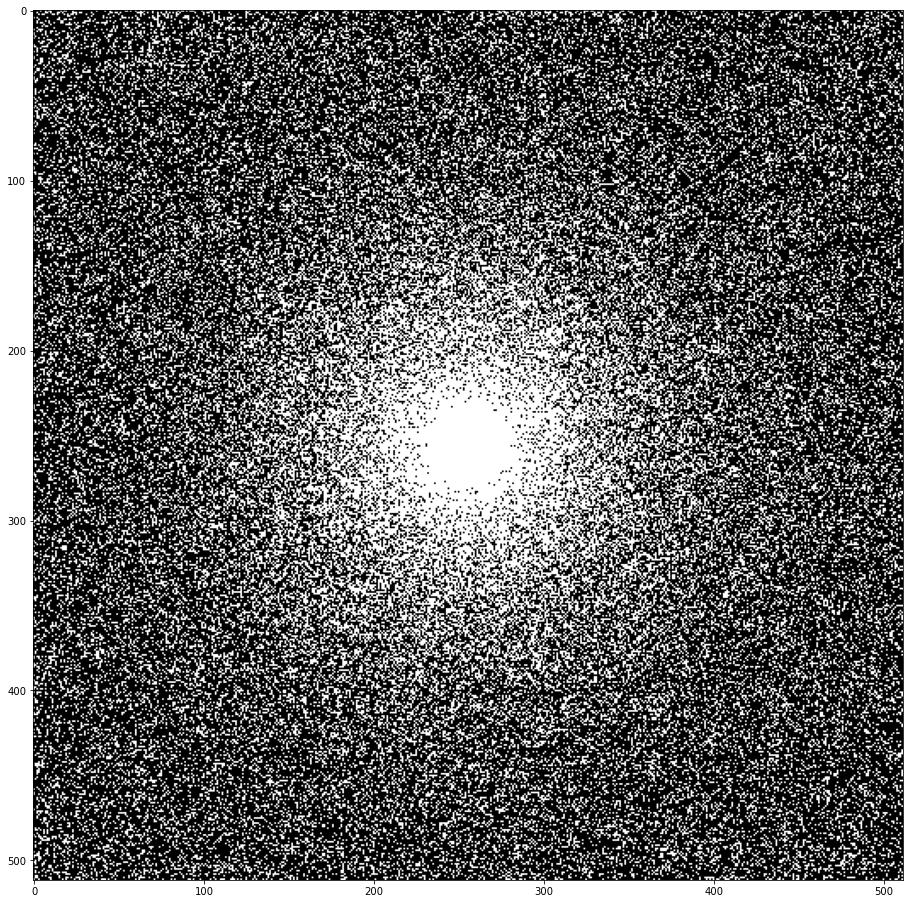

In [42]:
imshowgray(mask_vardens)